In [1]:
import os
import sys

os.chdir("..")
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt

from gluonts.dataset.repository.datasets import get_dataset
from statsmodels.tsa.seasonal import STL

from src.utils.transformations import manipulate_trend_component, manipulate_seasonal_determination

/anaconda/envs/whatif/lib/python3.8/site-packages/gluonts/json.py:45: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [3]:
save_dir = ".figures/transformations"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir, exist_ok=True)

ts = next(iter(get_dataset("m4_monthly").test))["target"][-100:]
decomp = STL(ts, period=6).fit()

f_inc = manipulate_trend_component(decomp.trend, f=5, g=1, h=1, m=0) + decomp.seasonal + decomp.resid
f_dec = manipulate_trend_component(decomp.trend, f=0.5, g=1, h=1, m=0) + decomp.seasonal + decomp.resid

h_inc = manipulate_trend_component(decomp.trend, f=1, g=1, h=5, m=0) + decomp.seasonal + decomp.resid
h_dec = manipulate_trend_component(decomp.trend, f=1, g=1, h=0.5, m=0) + decomp.seasonal + decomp.resid

m_inc = manipulate_trend_component(decomp.trend, f=1, g=1, h=1, m=0.5 / len(ts)) + decomp.seasonal + decomp.resid
m_dec = manipulate_trend_component(decomp.trend, f=1, g=1, h=1, m=-0.5 / len(ts)) + decomp.seasonal + decomp.resid

k_inc = manipulate_seasonal_determination(decomp.seasonal, k=5) + decomp.trend + decomp.resid
k_dec = manipulate_seasonal_determination(decomp.seasonal, k=0.5) + decomp.trend + decomp.resid

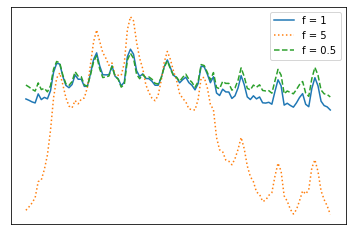

In [4]:
plt.plot(ts, label="f = 1")
plt.plot(f_inc, label="f = 5", linestyle=":")
plt.plot(f_dec, label="f = 0.5", linestyle="--")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.savefig(os.path.join(save_dir, "transformation_f.svg"))

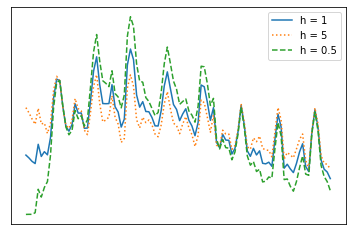

In [5]:
plt.plot(ts, label="h = 1")
plt.plot(h_inc, label="h = 5", linestyle=":")
plt.plot(h_dec, label="h = 0.5", linestyle="--")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.savefig(os.path.join(save_dir, "transformation_h.svg"))

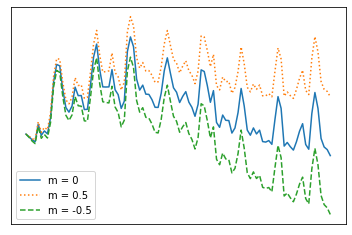

In [6]:
plt.plot(ts, label="m = 0")
plt.plot(m_inc, label="m = 0.5", linestyle=":")
plt.plot(m_dec, label="m = -0.5", linestyle="--")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.savefig(os.path.join(save_dir, "transformation_m.svg"))

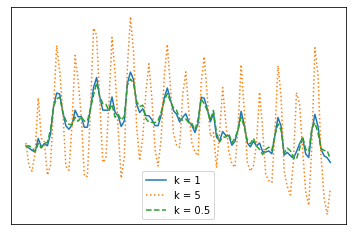

In [7]:
plt.plot(ts, label="k = 1")
plt.plot(k_inc, label="k = 5", linestyle=":")
plt.plot(k_dec, label="k = 0.5", linestyle="--")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.savefig(os.path.join(save_dir, "transformation_k.svg"))